# Taxi Q-learning

In [1]:
import numpy as np
import gym
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
env = gym.make("Taxi-v3")
env.reset
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### List of actions and states

#### actions:
- 1: south
- 2: north
- 3: east
- 4: west
- 5: pickup
- 6: dropoff

#### states:

5x5 grid with 4 destinations and 5 passenger locations (4 pickup points + 1 when passenger is in the taxi). Then 5x5x4x5 = 500 possible states

In [3]:
print("Number of actions: %d" % env.action_space.n)
print("Number of states: %d" % env.observation_space.n)

action_size = env.action_space.n
state_size = env.observation_space.n

Number of actions: 6
Number of states: 500


In [4]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [11]:
total_episodes = 1000
max_steps = 99

alpha = 0.7 # learning rate
gamma = 0.9 # discount rate

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

training episode 100
training episode 200
training episode 300
training episode 400
training episode 500
training episode 600
training episode 700
training episode 800
training episode 900
training episode 1000
[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.58568214  0.46035238 -0.58568212  0.46035239  1.62261467 -8.53965532]
 [ 4.348907    5.94323     4.348907    5.94323     7.7147     -3.05677001]
 ...
 [ 6.12240481  9.60827283  5.48126593  5.6997104  -3.53161636 -3.52266202]
 [ 1.62118144  2.91399142  1.60497551  2.9140163  -7.37750831 -7.37745443]
 [14.29999928 11.86999369 14.3        17.          5.3         5.3       ]]


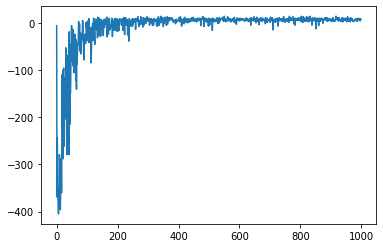

In [23]:
rewards = []

for episode in range(total_episodes):
    #Reset environment every time a new episode begins
    state = env.reset()
    step = 0
    done = False
    
    total_rewards = 0
    
    for step in range(max_steps):
        ### Choose an action in current state
        # Generate random number between 0 and 1
        exp_exp_tradeoff = random.uniform(0,1)
        
        '''
        If random number > epsilon --> exploitation (select the action with the biggest Q value for this state)
        Else, do a random choice --> exploration
        ''' 
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state, :])
        else:
            action = env.action_space.sample()
        
        #Do the action (a) and observe the outcome state (s') and reward (R)
        new_state, reward, done, info = env.step(action)
        
        # Increment total reward
        total_rewards += reward
    
        '''
        Update q value for the state based on the Bellman formula
        Q(s,a) = Q(s,a) + lr[R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        '''
        qtable[state, action] = qtable[state, action] + \
            alpha * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        state = new_state
        
        if done is True:
            break
    
    # Increment episode
    episode += 1
    
    # Save reward of each step
    rewards.append(total_rewards) 
    
    #Reduce epsilon (because we want to reduce the number of exploration as time passes)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    
    if episode%100 == 0:
        print('training episode',episode)
        
# Plot learning graph
plt.plot(rewards)
print(qtable)

In [28]:
state = env.reset()
step = 0
done = False
total_rewards = 0

for step in range(max_steps):
    print('qtable row for given state:',qtable[state, :])
    env.render()
    
    action = np.argmax(qtable[state, :])
    new_state, reward, done, info = env.step(action)
    total_rewards += reward
    
    if done is True:
        print('qtable row for given state:',qtable[state, :])
        env.render()
        print("Score: ", total_rewards)
        break
    state = new_state
    
env.close()

qtable row for given state: [ -2.37440252  -3.82385363  -3.82659074  -3.16366274 -12.13706458
 -12.13696373]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

qtable row for given state: [ -3.1370428   -3.13696354  -3.13700914  -1.52711391 -11.37440413
 -11.37440476]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
qtable row for given state: [ -2.37450143  -2.37440261  -2.37440312  -0.58568212 -10.52711646
 -10.52711391]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
qtable row for given state: [ 0.4603532  -1.52711391 -1.52711391 -0.58568212 -9.58568212 -9.58568212]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
qtable row for given state: [ 1.62261467 -0.58568212  0.4603532   0.46034267 -8.53964683 -8.53964681]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
qtable row